<div class="alert alert-block alert-success">
<h1>
<font color=green>
ПРОЕКТ №8. Принятие решений в бизнесе на основе данных
</font>
</h1>
</div>

# Цели и задачи проекта:
 - Приоритизировать гипотезы
 - Запустить A/B-тест
 - Проанализировать результаты. 

# Входные данные:
1. Таблица **hypothesis**:
 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
 
 
2. Таблица **orders**:
 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.
 
 
3. Таблица **visitors**:
 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<a name="0">-></a> 

# Содержание:   
  
<p>
<a href="#1.">1. Приоритизация гипотез</a>
    <div><a href="#1.1.">&ensp;1.1. Применение фреймворка ICE для приоритизации гипотез</a></div>
    <div><a href="#1.2.">&ensp;1.2. Применение фреймворка RICE для приоритизации гипотез</a></div>
    <div><a href="#1.3.">&ensp;1.3. Выводы по разнице результатов применения фреймворков ICE и RICE.</a></div>
</p> 

<p>
<a href="#2.">2. Анализ A/B-теста</a>
    <div><a href="#2.1.">&ensp;2.1. Первичный обзор и подготовка таблиц с заказами и посетителями</a></div>
    <div><a href="#2.2.">&ensp;2.2. Предварительное агрегирование данных</a></div>
    <div><a href="#2.3.">&ensp;2.3. График кумулятивной выручки по группам</a></div>
    <div><a href="#2.4.">&ensp;2.4. График кумулятивного среднего чека по группам</a></div>
    <div><a href="#2.5.">&ensp;2.5. График относительного изменения кумулятивного среднего чека группы B к группе A</a></div>
    <div><a href="#2.6.">&ensp;2.6. График кумулятивной конверсии по группам</a></div>
    <div><a href="#2.7.">&ensp;2.7. График относительного изменения кумулятивной конверсии группы B к группе A</a></div>
    <div><a href="#2.8.">&ensp;2.8. Точечный график количества заказов по пользователям</a></div>
    <div><a href="#2.9.">&ensp;2.9. 95-й и 99-й перцентили количества заказов на пользователя</a></div>
    <div><a href="#2.10.">&ensp;2.10. Точечный график стоимостей заказов</a></div>
    <div><a href="#2.11.">&ensp;2.11. 95-й и 99-й перцентили стоимости заказов</a></div>
    <div><a href="#2.12.">&ensp;2.12. Статистическая значимость различий в конверсии между группами по «сырым» данным</a></div>
    <div><a href="#2.13.">&ensp;2.13. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным</a></div>
    <div><a href="#2.14.">&ensp;2.14. Статистическая значимость различий в конверсии между группами по «очищенным» данным</a></div>
    <div><a href="#2.15.">&ensp;2.15. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным</a></div>
    <div><a href="#2.16.">&ensp;2.16. Дополнения к проведенным подсчетам</a></div>
    <div><a href="#2.17.">&ensp;2.17. Выводы по результатам теста</a></div>
</p>

<p><a href="#3.">3. Общий вывод</a></p> 

<a name="1.">-></a> 
<a href="#0">К содержанию</a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 150)
register_matplotlib_converters()

# 1. Приоритизация гипотез

Загружу таблицу с гипотезами и приведу названия столбцов к нижнему регистру:

In [3]:
hypothesis = pd.read_csv('datasets/hypothesis.csv')

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

<a name="1.1.">-></a> 
<a href="#0">К содержанию</a>

## 1.1. Применение фреймворка ICE для приоритизации гипотез

In [5]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Добавлю столбец со значениями ICE и отсортирую по убыванию приоритета:

In [6]:
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 3)
hypothesis.sort_values(by='ICE', ascending=False, inplace=True)

Также добавлю столбец с приоритетами гипотез - в соответствии со значениями ICE:

In [7]:
hypothesis['ICE_priority'] = [num for num in range(1, len(hypothesis)+1)]
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,ICE_priority
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,1
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,2
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,4
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,5
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,6
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,7
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,9


<a name="1.2.">-></a> 
<a href="#0">К содержанию</a>

## 1.2. Применение фреймворка RICE для приоритизации гипотез

Добавлю столбец со значениями RICE и отсортирую по убыванию приоритета:

In [8]:
hypothesis['RICE'] = round(hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 3)
hypothesis.sort_values(by='RICE', ascending=False, inplace=True)

Добавлю столбец с приоритетами гипотез - в соответствии со значениями RICE:

In [9]:
hypothesis['RICE_priority'] = [num for num in range(1, len(hypothesis)+1)]
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,ICE_priority,RICE,RICE_priority
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,3,112.0,1
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,5,56.0,2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,2,40.0,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,4,40.0,4
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,1,16.2,5
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,8,9.0,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,6,4.0,7
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,7,4.0,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,9,3.0,9


<a name="1.2.">-></a> 
<a href="#0">К содержанию</a>

## 1.3. Выводы по разнице результатов применения фреймворков ICE и RICE.

После применения фреймворка RICE вместо ICE вперед вышли гипотезы с максимальным показателем охвата аудитории Reach.  Но пятерка лидеров не изменилась. Итоговый рейтинг таков:

In [10]:
hypothesis_abbr = hypothesis[['ICE_priority', 'RICE_priority']].copy(deep=True).set_index(hypothesis['hypothesis'])
hypothesis_abbr.style.background_gradient(cmap='viridis')

,ICE_priority,RICE_priority
hypothesis,,
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",3,1
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",5,2
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",2,3
"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",4,4
"Запустить акцию, дающую скидку на товар в день рождения",1,5
"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,6
"Запустить собственную службу доставки, что сократит срок доставки заказов",6,7
"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",7,8
"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",9,9


<a name="2.">-></a> 
<a href="#0">К содержанию</a>

# 2. Анализ A/B-теста

<a name="2.1.">-></a> 
<a href="#0">К содержанию</a>

## 2.1. Первичный обзор и подготовка таблиц с заказами и посетителями

Необходимые для работы таблицы с заказами и посетителями:

In [11]:
orders = pd.read_csv('datasets/orders.csv')
visitors = pd.read_csv('datasets/visitors.csv')

In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Проверю типы данных в столбцах:

In [14]:
orders.dtypes

transactionId     int64
visitorId         int64
date             object
revenue           int64
group            object
dtype: object

In [15]:
visitors.dtypes

date        object
group       object
visitors     int64
dtype: object

Изменю в обеих таблицах тип данных в столбце **date** на **datetime**:

In [16]:
orders['date'] = orders['date'].astype('datetime64[D]')
visitors['date'] = visitors['date'].astype('datetime64[D]')

Проверю изменения:

In [17]:
print(orders['date'].dtype, visitors['date'].dtype)

datetime64[ns] datetime64[ns]


Посмотрю сколько имеется полезной информации в таблицах. В таблице с заказами есть данные о стольких транзакциях:

In [18]:
orders_num = orders.shape[0]
orders_num

1197

В таблице с посетителями есть данные о стольких посещениях(анонимных):

In [19]:
visitors_sum = visitors['visitors'].sum()
visitors_sum

37652

Покажу временной период, за который имеются данные:

In [20]:
print('''Начальная дата таблицы с заказами: {}
Начальная дата таблицы с посетителями: {}
Конечная дата таблицы с заказами: {}
Конечная дата таблицы с посетителями: {}'''
.format(orders['date'].min(), visitors['date'].min(), orders['date'].max(), visitors['date'].max()))

Начальная дата таблицы с заказами: 2019-08-01 00:00:00
Начальная дата таблицы с посетителями: 2019-08-01 00:00:00
Конечная дата таблицы с заказами: 2019-08-31 00:00:00
Конечная дата таблицы с посетителями: 2019-08-31 00:00:00


Проверю таблицы на пропуски:

In [21]:
print('Всего пропусков в таблице {0}: {2}\nВсего пропусков в таблице {1}: {3}'
      .format('orders', 'visitors', orders.isna().sum().sum(), visitors.isna().sum().sum()))

Всего пропусков в таблице orders: 0
Всего пропусков в таблице visitors: 0


Проверю таблицы на дубликаты:

In [22]:
print('Всего дублирующих строк в таблице {0}: {2}\nВсего дублирующих строк в таблице {1}: {3}'
      .format('orders', 'visitors', orders.duplicated().sum(), visitors.duplicated().sum()))

Всего дублирующих строк в таблице orders: 0
Всего дублирующих строк в таблице visitors: 0


Проверю, есть ли покупатели, попавшие в обе группы.

In [23]:
buyers_A = pd.DataFrame(data = orders.query('group == "A"')['visitorId'].unique())
buyers_B = pd.DataFrame(data = orders.query('group == "B"')['visitorId'].unique())
cross_buyers = buyers_A.merge(buyers_B)
print('Покупателей, попавших в обе группы: {}'.format(cross_buyers.shape[0]))

Покупателей, попавших в обе группы: 58


Записи о покупках таких клиентов могут исказить результаты последующих расчетов. Поэтому удалю их из таблицы с заказами:

In [24]:
cross_buyers.columns = ['visitorId']
orders = orders[np.logical_not(orders['visitorId'].isin(cross_buyers['visitorId']))]

Число записей о транзакциях уменьшилось на столько процентов:

In [25]:
orders_cut_part = round(abs(orders.shape[0] / orders_num - 1), 2)
print(orders_cut_part * 100, '%')

15.0 %


Теперь число записей о покупках такое:

In [26]:
orders.shape[0]

1016

К сожалению в таблице с посетителями нет данных о пользовательском идентификаторе и аккуратно удалить записи об этих пользователях не получится. Поэтому умножу столбец с визитами на такой коэффициент: **(1 - конверсия * orders_cut_part)**.  
Конверсию на данном этапе посчитаю как отношение числа всех заказов к числу всех визитов.

In [27]:
visitors['visitors'] = (
    visitors['visitors']
    * (1 - (orders_num / visitors_sum ) * orders_cut_part)
).astype('int')

Число визитов уменьшилось на столько процентов:

In [28]:
round(abs(visitors['visitors'].sum() / visitors_sum - 1), 3) * 100

0.6

Новое значение числа посещений:

In [29]:
visitors['visitors'].sum()

37443

**Вывод:**
 - В таблицах имеются данные с 2019-08-01 по 2019-08-31 включительно
 - Пропусков и дубликатов в таблицах нет
 - В таблице с заказами 58 покупателей оказались в обеих группах. Записи об этих транзакциях я удалил. Размер таблицы с заказами уменьшился на 15 процентов и составил 1016 строк
 - Количество известных посещений: 37443. Это значение также является "оптимизированным", т.к. информацию о покупателях, попавших в обе группы, необходимо было удалить и из таблицы посещений. Получившееся число визитов меньше на 0.6 процента первоначального. 

<a name="2.2.">-></a> 
<a href="#0">К содержанию</a>

## 2.2. Предварительное агрегирование данных

Объединю таблицы с заказами и визитами в одну - с кумулятивными данными, агрегированными по дате. Она понадобится до конца проекта.   
Сначала создам таблицу со всеми имющимися сочетаниями "дата заказа - группа":

In [30]:
dates_groups = orders[['date','group']].drop_duplicates()
dates_groups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Создам сгруппированную по дате и группе таблицу заказов с кумулятивными данными:

In [31]:
orders_aggregated = (
    dates_groups
    .apply(lambda x: orders[np.logical_and(orders['date']<=x['date'], orders['group']==x['group'])]
          .agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis=1)
    .sort_values(by=['date', 'group'])
    .reset_index(drop=True)
)

Создам сгруппированную по дате и группе таблицу визитов с кумулятивными данными:

In [32]:
visitors_aggregated = (
    dates_groups
    .apply(lambda x: visitors[np.logical_and(visitors['date']<=x['date'], visitors['group']==x['group'])]
          .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)
    .sort_values(by=['date', 'group'])
    .reset_index(drop=True)
)

Объединю эти две таблицы:

In [33]:
data_aggregated = pd.merge(orders_aggregated, visitors_aggregated, on=['date','group'])
data_aggregated.columns = ['date','group','transactions','buyers','revenue','visitors']

Создам столбец со средними чеками:

In [34]:
data_aggregated['mean_check'] = round(data_aggregated['revenue'] / data_aggregated['transactions'], 3)
data_aggregated_A = data_aggregated.query('group == "A"')
data_aggregated_B = data_aggregated.query('group == "B"')

Добавлю столбец с конверсиями визитов в покупки:

In [35]:
data_aggregated['conversion'] = round(data_aggregated['transactions'] / data_aggregated['visitors'], 5)
data_aggregated.head()

,date,group,transactions,buyers,revenue,visitors,mean_check,conversion
0,2019-08-01,A,23,19,142779,715,6207.783,0.03217
1,2019-08-01,B,17,17,59758,709,3515.176,0.02398
2,2019-08-02,A,42,36,234381,1331,5580.500,0.03156
3,2019-08-02,B,40,39,221801,1287,5545.025,0.03108
4,2019-08-03,A,66,60,346854,1835,5255.364,0.03597


Агрегированные таблицы по группам:

In [36]:
data_aggregated_A = data_aggregated.query('group == "A"')
data_aggregated_B = data_aggregated.query('group == "B"')

<a name="2.3.">-></a> 
<a href="#0">К содержанию</a>

## 2.3. График кумулятивной выручки по группам

Графики кумулятивных выручек по группам:

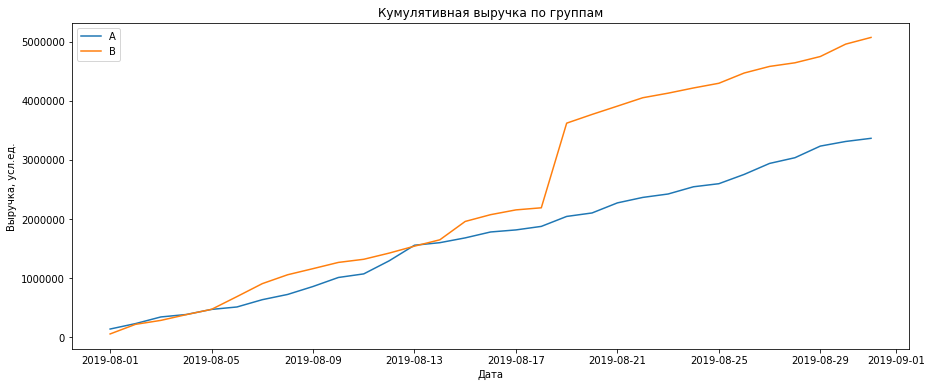

In [37]:
plt.figure(figsize=[15,6])
plt.plot(data_aggregated_A['date'], data_aggregated_A['revenue'], label='A')
plt.plot(data_aggregated_B['date'], data_aggregated_B['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка, усл.ед.')
plt.legend()
plt.show()

**Выводы и предположения:**
 - Примерно до 18-19 августа(и после этих дат) изменение кумулятивной выручки группы **В** коррелирует с таковой для группы **А**.  
 - Общая сумма выручки группы **В** к этой дате несколько превышает выручку группы **А**. 
 - Ориентировочно 19 августа у группы **В** наблюдается резкий скачек. Он может быть объяснен крупными и/или участившимися заказами в этот день.

<a name="2.4.">-></a> 
<a href="#0">К содержанию</a>

## 2.4. График кумулятивного среднего чека по группам

Графики кумулятивных средних чеков по группам:

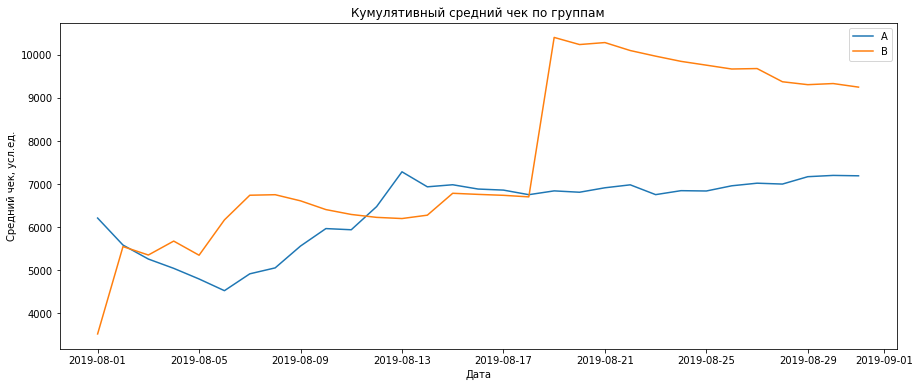

In [38]:
plt.figure(figsize=[15,6])
plt.plot(data_aggregated_A['date'], data_aggregated_A['mean_check'], label='A')
plt.plot(data_aggregated_B['date'], data_aggregated_B['mean_check'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек, усл.ед.')
plt.legend()
plt.show()

**Выводы и предположения:**
 - С учетом предыдущего графика можно предположить, что на всем интервале времени в группе **B** совершается меньше покупок - за исключением небольшой области возле 13 августа
 - На обоих графиках около 19 августа присутствуют похожие скачки. Вероятнее всего это объясняется аномальной стоимостью покупок в этот день, а не их количеством  
 - После 19 августа показатель группы **В** падает, хотя выручка почти линейно растет. Это может быть связано с увеличением числа покупок, но с уменьшением их стоимостей. 

<a name="2.5.">-></a> 
<a href="#0">К содержанию</a>

## 2.5. График относительного изменения кумулятивного среднего чека группы B к группе A

Объединю таблицы **data_aggregated_A** и **data_aggregated_B** по дате:

In [39]:
merged_data_aggregated_AB = pd.merge(
    data_aggregated_A, data_aggregated_B,
    how='left', on='date', suffixes=['_A','_B'])
merged_data_aggregated_AB.head(3)

,date,group_A,transactions_A,buyers_A,revenue_A,visitors_A,mean_check_A,conversion_A,group_B,transactions_B,buyers_B,revenue_B,visitors_B,mean_check_B,conversion_B
0,2019-08-01,A,23,19,142779,715,6207.783,0.03217,B,17,17,59758,709,3515.176,0.02398
1,2019-08-02,A,42,36,234381,1331,5580.500,0.03156,B,40,39,221801,1287,5545.025,0.03108
2,2019-08-03,A,66,60,346854,1835,5255.364,0.03597,B,54,53,288850,1793,5349.074,0.03012


График относительного изменения кумулятивного среднего чека группы **B** к группе **A**:

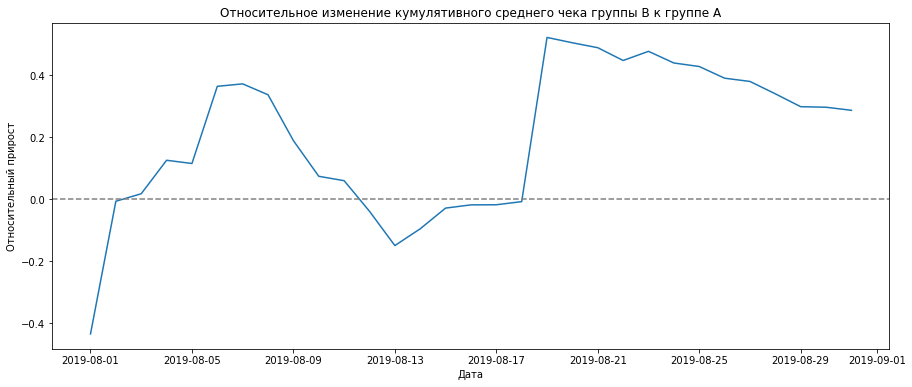

In [40]:
plt.figure(figsize=[15,6])
plt.plot(merged_data_aggregated_AB['date'],
    merged_data_aggregated_AB['mean_check_B'] / merged_data_aggregated_AB['mean_check_A'] - 1)
plt.ylabel('Относительный прирост')
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

**Выводы и предположения:**
 - Почти на всем интервале времени средний чек группы **В** превышает таковой у группы **А**
 - Примерно до середины августа на данные,возможно, сильно влиял эффект подглядывания
 - Примерно 19 августа аномалия в группе **В** вывела ее сильно вперед
 - Последующие 2 недели группа **В** постепенно сдает позиции
 - Предположительно после 29 августа полностью "уходит" эффект подглядывания и можно оценить реальную разницу между группами. Желательны дальнейшие наблюдения.

<a name="2.6.">-></a> 
<a href="#0">К содержанию</a>

## 2.6. График кумулятивной конверсии по группам

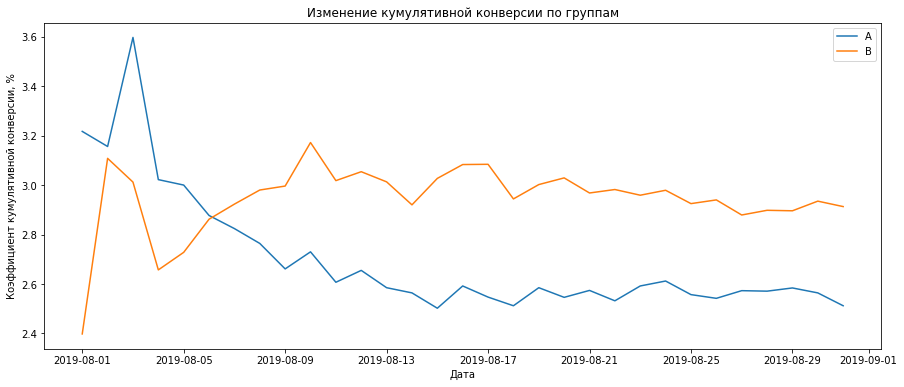

In [41]:
plt.figure(figsize=[15,6])
plt.plot(data_aggregated_A['date'], 100*data_aggregated_A['conversion'], label='A')
plt.plot(data_aggregated_B['date'], 100*data_aggregated_B['conversion'], label='B')
plt.title('Изменение кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Коэффициент кумулятивной конверсии, %')
plt.legend()
plt.show()

**Выводы и предположения:**
 - Примерно до 6-10 августа наблюдаются резкие скачки, вероятно, обусловленные эффектом подглядывания
 - Затем характер поведения графиков практически не меняется, что может свидетельствовать о равенстве конверсии в группах.

<a name="2.7.">-></a> 
<a href="#0">К содержанию</a>

## 2.7. График относительного изменения кумулятивной конверсии группы B к группе A

Воспользуюсь созданной ранее таблицей **merged_data_aggregated_AB**

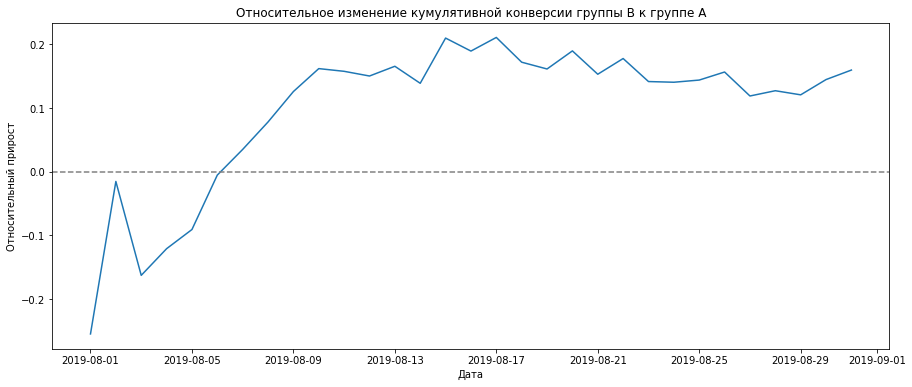

In [42]:
plt.figure(figsize=[15,6])
plt.plot(merged_data_aggregated_AB['date'],
    merged_data_aggregated_AB['conversion_B'] / merged_data_aggregated_AB['conversion_A'] - 1)
plt.ylabel('Относительный прирост')
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

**Выводы и предположения:**
 - В последние 14 дней наблюдений график стабилизируется и можно уже предположить 10-15% рост конверсии в группе **В** относительно группы **А**. Но он может быть обусловлен эффектом подглядывания в первые недели опыта.

<a name="2.8.">-></a> 
<a href="#0">К содержанию</a>

## 2.8. Точечный график количества заказов по пользователям

Сгруппирую таблицу с заказами **orders** по покупателям и посчитаю их заказы:

In [43]:
orders_by_users = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
orders_by_users.columns = ['visitorId','transactions']

Точечный график количества заказов по пользователям

In [44]:
len(orders_by_users)

973

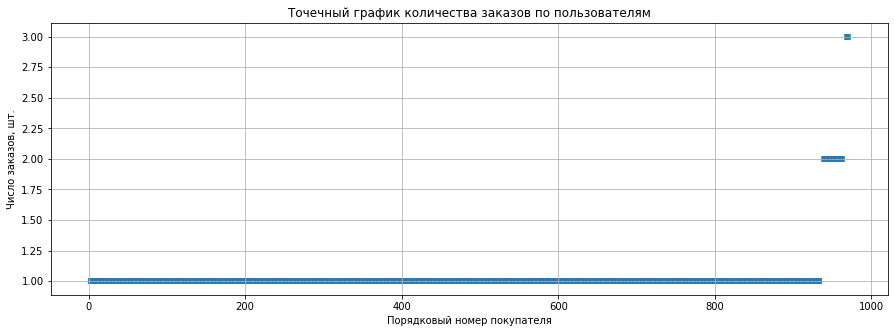

In [45]:
plt.figure(figsize=[15,5])
plt.scatter(
    pd.Series(range(0,len(orders_by_users))),
    orders_by_users['transactions'].sort_values(),
    marker='|'
)
plt.grid()
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Порядковый номер покупателя')
plt.ylabel('Число заказов, шт.')
plt.show()

Топ-10 значений числа покупок:

In [46]:
orders_by_users['transactions'].sort_values(ascending=False).head(10)

55     3
890    3
632    3
908    3
138    3
687    3
478    3
901    2
94     2
940    2
Name: transactions, dtype: int64

**Выводы и предположения:**
 - Подавляющее число пользователей совершили одну покупку  
 - Предварительно приму, что значимое число покупок на пользователя: три.

<a name="2.9.">-></a> 
<a href="#0">К содержанию</a>

## 2.9. 95-й и 99-й перцентили количества заказов на пользователя

In [47]:
user_orders_percentiles = np.percentile(orders_by_users['transactions'],[95,99]).astype('int')
print('95-й перцентиль: {0} {2} \n99-й перцентиль: {1} {2}'
      .format(user_orders_percentiles[0], user_orders_percentiles[1], 'заказа'))

95-й перцентиль: 1 заказа 
99-й перцентиль: 2 заказа


В качестве границы для определения аномальных пользователей приму значение, равное 99-му перцентилю.

In [48]:
user_orders_border = user_orders_percentiles[1]
print('Граница по числу заказов: {}'.format(user_orders_border))

Граница по числу заказов: 2


Т.е. записи пользователей с числом заказов более, чем **user_orders_border**, буду считать аномальными.

<a name="2.10.">-></a> 
<a href="#0">К содержанию</a>

## 2.10. Точечный график стоимостей заказов

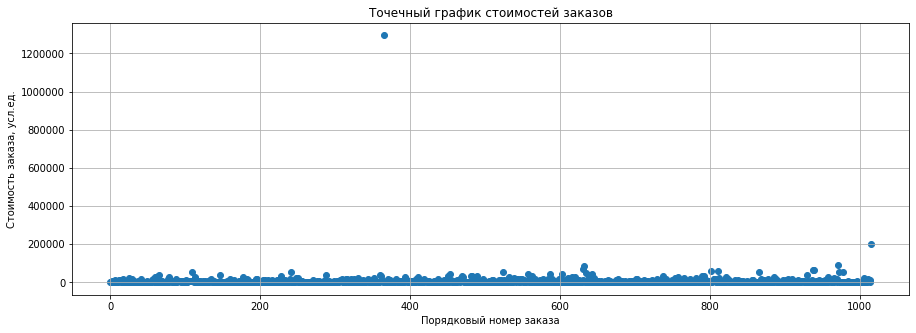

In [49]:
plt.figure(figsize=[15,5])
plt.scatter(pd.Series(range(0,len(orders))), orders['revenue'])
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Порядковый номер заказа')
plt.ylabel('Стоимость заказа, усл.ед.')
plt.show()

Топ-5 заказов:

In [50]:
orders['revenue'].sort_values(ascending=False).head()

425     1294500
1196     202740
1136      92550
744       86620
743       67990
Name: revenue, dtype: int64

**Выводы и предположения:**
 - Почти все заказы дешевле 100000  
 - Есть 2 явно аномальных заказа: на 200000 и 1200000. Заказы около 100000 тоже являются необычными.

<a name="2.11.">-></a> 
<a href="#0">К содержанию</a>

## 2.11. 95-й и 99-й перцентили стоимости заказов

In [51]:
revenue_percentiles = np.percentile(orders['revenue'],[95,99]).astype('int')
print('95-й перцентиль: {0} {2} \n99-й перцентиль: {1} {2}'
      .format(revenue_percentiles[0], revenue_percentiles[1], 'усл.ед.'))

95-й перцентиль: 26785 усл.ед. 
99-й перцентиль: 53904 усл.ед.


В качеcтве границы для определения аномальных заказов приму вычисленное значение 99-го перцентиля. Т.е.

In [52]:
revenue_border = revenue_percentiles[1]
print('Граница по стоимости заказа: {} усл.ед.'.format(revenue_border))

Граница по стоимости заказа: 53904 усл.ед.


Т.е. записи заказов со стоимостью более, чем **revenue_border**, буду считать аномальными.

<a name="2.12.">-></a> 
<a href="#0">К содержанию</a>

## 2.12. Статистическая значимость различий в конверсии между группами по «сырым» данным

Сгруппирую данные заказов по id покупателей и агрегирую число заказов и их суммы:

In [53]:
data_by_users_A = (
    orders.query('group == "A"').groupby('visitorId', as_index=False).agg({'transactionId':'nunique','revenue':'sum'})
)
data_by_users_B = (
    orders.query('group == "B"').groupby('visitorId', as_index=False).agg({'transactionId':'nunique','revenue':'sum'})
)
data_by_users_A.columns = ['visitorId', 'orders', 'revenue']
data_by_users_B.columns = ['visitorId', 'orders', 'revenue']
data_by_users_A.head()

,visitorId,orders,revenue
0,11685486,1,6201
1,54447517,1,130
2,66685450,1,7990
3,78758296,1,1044
4,85103373,1,1220


Число пользователей, не совершивших покупки (по группам):

In [54]:
null_users_A = visitors.query('group == "A"')['visitors'].sum() - len(data_by_users_A)
null_users_B = visitors.query('group == "B"')['visitors'].sum() - len(data_by_users_B)
print('Группа А: {} \nГруппа В: {}'.format(null_users_A, null_users_B))

Группа А: 18189 
Группа В: 18281


Таблицы по заказам и выручке посетителей, не совершивших покупки:

In [55]:
#Группа А
data_by_null_users_A = pd.DataFrame([[0,0,0]], index=np.arange(null_users_A))
data_by_null_users_A.index = data_by_null_users_A.index + data_by_users_A.index.max() + 1
data_by_null_users_A.columns = ['visitorId', 'orders', 'revenue']
#Группа В
data_by_null_users_B = pd.DataFrame([[0,0,0]], index=np.arange(null_users_B))
data_by_null_users_B.index = data_by_null_users_B.index + data_by_users_B.index.max() + 1
data_by_null_users_B.columns = ['visitorId', 'orders', 'revenue']
data_by_null_users_A.head()

,visitorId,orders,revenue
445,0,0,0
446,0,0,0
447,0,0,0
448,0,0,0
449,0,0,0


Объединю таблицы с покупателями и прочими посетителями:

In [56]:
#Группа А
sample_A = pd.concat([data_by_users_A, data_by_null_users_A], axis=0)
#Группа В
sample_B = pd.concat([data_by_users_B, data_by_null_users_B], axis=0)
sample_A

,visitorId,orders,revenue
0,11685486,1,6201
1,54447517,1,130
2,66685450,1,7990
3,78758296,1,1044
4,85103373,1,1220
...,...,...,...
18629,0,0,0
18630,0,0,0
18631,0,0,0
18632,0,0,0


Вывод о статистической значимости различий в конверсии между группами сделаю по значениям количества заказов таблиц **sample_A** и **sample_В**. Сформулирую гипотезы:  
 - Нулевая гипотеза: В группах А и В средние конверсии одинаковы
 - Альтернативная гипотеза: В группах А и В средние конверсии отличаются


In [57]:
conversion_pvalue = st.mannwhitneyu(sample_A['orders'], sample_B['orders'])[1]
print('Значение p-value при проверке гипотезы о равности средних конверсий в группах A и B: {:.5f}'
      .format(conversion_pvalue))

Значение p-value при проверке гипотезы о равности средних конверсий в группах A и B: 0.00545


In [58]:
if conversion_pvalue > 0.05:
    print('Гипотеза о равности средних конверсий в группах А и В скорее верная')
else:
    print('Гипотеза о равности средних конверсий в группах А и В скорее ложная')

Гипотеза о равности средних конверсий в группах А и В скорее ложная


Относительный прирост конверсии группы В:

In [59]:
conversion_gain = sample_B['orders'].mean() / sample_A['orders'].mean() - 1
print('{:.1f} %'.format(conversion_gain*100))

16.0 %


**Выводы:**
 - Гипотезу о схожести конверсии в группах A и B не удалось подтвердить
 - Средняя конверсия в группе В выше почти на 13.8%

<a name="2.13.">-></a> 
<a href="#0">К содержанию</a>

## 2.13. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Добавлю столбец со средним чеком:

In [60]:
#Группа А
data_by_users_A['mean_check'] = data_by_users_A['revenue'] / data_by_users_A['orders']
#Группа В
data_by_users_B['mean_check'] = data_by_users_B['revenue'] / data_by_users_B['orders'] 
data_by_users_A

,visitorId,orders,revenue,mean_check
0,11685486,1,6201,6201.0
1,54447517,1,130,130.0
2,66685450,1,7990,7990.0
3,78758296,1,1044,1044.0
4,85103373,1,1220,1220.0
...,...,...,...,...
440,4227830084,1,16490,16490.0
441,4237561104,1,590,590.0
442,4243832526,1,8290,8290.0
443,4259830713,1,3190,3190.0


Вывод о статистической значимости различий в средних чеках между группами. Сформулирую гипотезы:  
 - Нулевая гипотеза: В группах А и В средние значения средних чеков одинаковы
 - Альтернативная гипотеза: В группах А и В средние значения средних чеков отличаются

In [61]:
mean_check_pvalue = st.mannwhitneyu(data_by_users_A['mean_check'], data_by_users_B['mean_check'])[1]
print('Значение p-value при проверке гипотезы о равности средних значений средних чеков в группах A и B: {:.5f}'
      .format(mean_check_pvalue))

Значение p-value при проверке гипотезы о равности средних значений средних чеков в группах A и B: 0.41073


In [62]:
if mean_check_pvalue > 0.05:
    print('Гипотеза о равности средних значений средних чеков в группах А и В скорее верная')
else:
    print('Гипотеза о равности средних значений средних чеков в группах А и В скорее ложная')

Гипотеза о равности средних значений средних чеков в группах А и В скорее верная


Относительный прирост значения среднего чека группы В:

In [63]:
mean_check_gain = data_by_users_B['mean_check'].mean() / data_by_users_A['mean_check'].mean() - 1
print('{:.1f} %'.format(mean_check_gain*100))

31.3 %


**Выводы:**
 - Гипотезу о схожести средних чеков в группах A и B не удалось опровергнуть
 - Средний чек в группе В выше почти на 31%

<a name="2.14.">-></a> 
<a href="#0">К содержанию</a>

## 2.14. Статистическая значимость различий в конверсии между группами по «очищенным» данным

Список покупателей, совершивших более **user_orders_border** покупок и/или с хотя бы одной дороже, чем **revenue_border** усл.ед.:

In [64]:
users_w_many_orders = pd.concat([data_by_users_A.query('orders > @user_orders_border')['visitorId'],
                                data_by_users_B.query('orders > @user_orders_border')['visitorId']],
                                axis=0)
users_w_expansive_orders = orders.query('revenue > @revenue_border')['visitorId']
abnormal_users = pd.concat([users_w_many_orders, users_w_expansive_orders], axis=0)
abnormal_users.head()

58      611059232
211    2108163459
310    2988190573
409    3908431265
416    3967698036
Name: visitorId, dtype: int64

Удалю данные аномальных пользователей из таблиц **sample_X**:

In [65]:
normal_sample_A = sample_A[np.logical_not(sample_A['visitorId'].isin(abnormal_users))]
normal_sample_B = sample_B[np.logical_not(sample_B['visitorId'].isin(abnormal_users))]

Вывод о статистической значимости различий в конверсии между группами сделаю по значениям количества заказов таблиц **normal_sample_A** и **normal_sample_B**. Сформулирую гипотезы:  
 - Нулевая гипотеза: В группах А и В средние конверсии одинаковы
 - Альтернативная гипотеза: В группах А и В средние конверсии отличаются

In [66]:
normal_conversion_pvalue = st.mannwhitneyu(normal_sample_A['orders'], normal_sample_B['orders'])[1]
print('Значение p-value при проверке гипотезы о равности конверсий в группах A и B: {:.5f}'.format(normal_conversion_pvalue))

Значение p-value при проверке гипотезы о равности конверсий в группах A и B: 0.00347


In [67]:
if normal_conversion_pvalue > 0.05:
    print('Гипотеза о равности средних конверсий в группах А и В скорее верная')
else:
    print('Гипотеза о равности средних конверсий в группах А и В скорее ложная')

Гипотеза о равности средних конверсий в группах А и В скорее ложная


Относительный прирост конверсии группы В:

In [68]:
normal_conversion_gain = normal_sample_B['orders'].mean() / normal_sample_A['orders'].mean() - 1
print('{:.1f} %'.format(normal_conversion_gain*100))

18.9 %


**Выводы:**
 - Гипотезу о схожести конверсии в группах A и B не удалось подтвердить
 - Средняя конверсия в группе В выше почти на 19%

<a name="2.15.">-></a> 
<a href="#0">К содержанию</a>

## 2.15. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Удалю данные аномальных пользователей из таблиц **data_by_users_X**:

In [69]:
normal_data_by_users_A = data_by_users_A[np.logical_not(data_by_users_A['visitorId'].isin(abnormal_users))]
normal_data_by_users_B = data_by_users_B[np.logical_not(data_by_users_B['visitorId'].isin(abnormal_users))]

Сформулирую гипотезы:  
 - Нулевая гипотеза: В группах А и В средние значения средних чеков одинаковы
 - Альтернативная гипотеза: В группах А и В средние значения средних чеков отличаются  
 
Вывод о статистической значимости различий в средних чеках между группами:

In [70]:
normal_mean_check_pvalue = st.mannwhitneyu(normal_data_by_users_A['mean_check'], normal_data_by_users_B['mean_check'])[1]
print('Значение p-value при проверке гипотезы о равности средних значений средних чеков в группах A и B: {:.5f}'.format(
    normal_mean_check_pvalue))

Значение p-value при проверке гипотезы о равности средних значений средних чеков в группах A и B: 0.42866


In [71]:
if normal_mean_check_pvalue > 0.05:
    print('Гипотеза о равности средних значений средних чеков в группах А и В скорее верная')
else:
    print('Гипотеза о равности средних значений средних чеков в группах А и В скорее ложная')

Гипотеза о равности средних значений средних чеков в группах А и В скорее верная


Относительный прирост значения среднего чека группы В:

In [72]:
normal_mean_check_gain = normal_data_by_users_B['mean_check'].mean() / normal_data_by_users_A['mean_check'].mean() - 1
print('{:.1f} %'.format(normal_mean_check_gain*100))

-1.6 %


**Выводы:**
 - Гипотезу о схожести средних чеков в группах A и B не удалось опровергнуть
 - Средний чек в группе В ниже на 1.6%

<a name="2.16.">-></a> 
<a href="#0">К содержанию</a>

## 2.16. Дополнения к проведенным подсчетам

### 2.16.1. Пересчет среднего чека без эффекта подглядывания

Первые 2 недели так или иначе наблюдался эффект подглядывания. Отфильтрую данные за это время и повторю основные вычисления. Временная граница для фильтрации данных:

In [73]:
date_border = (
    orders['date'].max() - 
    pd.to_timedelta(orders['date'].max() - orders['date'].min(), unit='D') 
    / 2
)

Отфильтрую таблицы с заказами и посетителями по граничной дате:

In [74]:
orders_2nd_half = orders.query('date > @date_border')
visitors_2nd_half = visitors.query('date > @date_border')

Удалю записи "аномальных" покупателей. Использую уже сформированный список **abnormal_users**

In [75]:
orders_2nd_half = orders_2nd_half[np.logical_not(orders_2nd_half['visitorId'].isin(abnormal_users))]

Cочетания "дата заказа - группа":

In [76]:
dates_groups_2nd_half = orders_2nd_half[['date','group']].drop_duplicates()
dates_groups_2nd_half.head()

,date,group
86,2019-08-22,A
87,2019-08-22,B
124,2019-08-17,A
125,2019-08-17,B
167,2019-08-23,A


Создам сгруппированную по дате и группе таблицу заказов с кумулятивными данными:

In [77]:
orders_aggregated_2nd_half = (
    dates_groups_2nd_half
    .apply(lambda x: orders_2nd_half[np.logical_and(orders_2nd_half['date']<=x['date'], 
                                                    orders_2nd_half['group']==x['group'])]
          .agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis=1)
    .sort_values(by=['date', 'group'])
    .reset_index(drop=True)
)

Создам сгруппированную по дате и группе таблицу визитов с кумулятивными данными:

In [78]:
visitors_aggregated_2nd_half = (
    dates_groups
    .apply(lambda x: visitors_2nd_half[np.logical_and(visitors_2nd_half['date']<=x['date'],
                                                      visitors_2nd_half['group']==x['group'])]
          .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)
    .sort_values(by=['date', 'group'])
    .reset_index(drop=True)
)

Объединю эти две таблицы:

In [79]:
data_aggregated_2nd_half = pd.merge(orders_aggregated_2nd_half, visitors_aggregated_2nd_half, on=['date','group'])
data_aggregated_2nd_half.columns = ['date','group','transactions','buyers','revenue','visitors']

Создам столбецы со средними чеками и конверсиями:

In [80]:
data_aggregated_2nd_half['mean_check'] = round(data_aggregated['revenue'] / data_aggregated['transactions'], 3)
data_aggregated_2nd_half['conversion'] = round(data_aggregated_2nd_half['transactions'] 
                                               / data_aggregated_2nd_half['visitors'], 5)
data_aggregated_2nd_half.head()

,date,group,transactions,buyers,revenue,visitors,mean_check,conversion
0,2019-08-17,A,6,5,34740,410,6207.783,0.01463
1,2019-08-17,B,13,13,80865,418,3515.176,0.03110
2,2019-08-18,A,19,18,94321,1074,5580.500,0.01769
3,2019-08-18,B,20,20,116188,1151,5545.025,0.01738
4,2019-08-19,A,40,39,262514,1573,5255.364,0.02543


Разделю данные по группам:

In [81]:
data_aggregated_A_2nd_half = data_aggregated_2nd_half.query('group == "A"')
data_aggregated_B_2nd_half = data_aggregated_2nd_half.query('group == "B"')

Объединю данные по группам, чтобы синхронизировать временные метки:

In [82]:
merged_data_aggregated_AB_2nd_half = pd.merge(
    data_aggregated_A_2nd_half, data_aggregated_B_2nd_half,
    how='left', on='date', suffixes=['_A','_B'])
merged_data_aggregated_AB_2nd_half.head(3)

,date,group_A,transactions_A,buyers_A,revenue_A,visitors_A,mean_check_A,conversion_A,group_B,transactions_B,buyers_B,revenue_B,visitors_B,mean_check_B,conversion_B
0,2019-08-17,A,6,5,34740,410,6207.783,0.01463,B,13,13,80865,418,3515.176,0.03110
1,2019-08-18,A,19,18,94321,1074,5580.500,0.01769,B,20,20,116188,1151,5545.025,0.01738
2,2019-08-19,A,40,39,262514,1573,5255.364,0.02543,B,40,39,251608,1635,5349.074,0.02446


Графики кумулятивных средних чеков по группам:

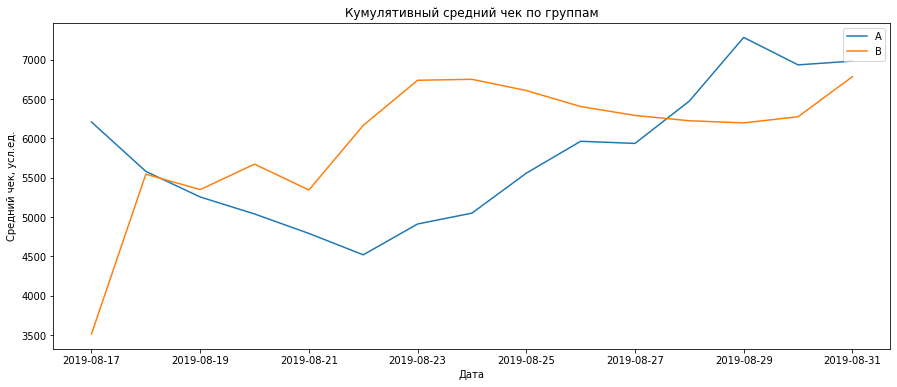

In [83]:
plt.figure(figsize=[15,6])
plt.plot(data_aggregated_A_2nd_half['date'], data_aggregated_A_2nd_half['mean_check'], label='A')
plt.plot(data_aggregated_B_2nd_half['date'], data_aggregated_B_2nd_half['mean_check'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек, усл.ед.')
plt.legend()
plt.show()

График относительного изменения кумулятивного среднего чека группы **B** к группе **A**:

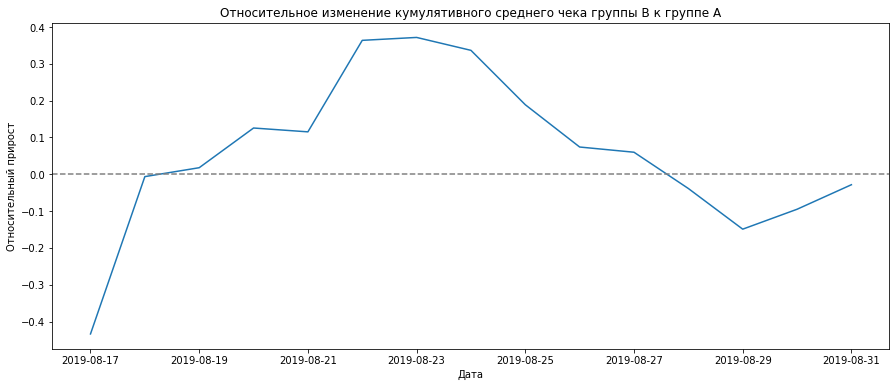

In [84]:
plt.figure(figsize=[15,6])
plt.plot(merged_data_aggregated_AB_2nd_half['date'],
    merged_data_aggregated_AB_2nd_half['mean_check_B'] / merged_data_aggregated_AB_2nd_half['mean_check_A'] - 1)
plt.ylabel('Относительный прирост')
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

Теперь сделаю вывод о статистической значимости различий в средних чеках между группами. Сформулирую гипотезы:  
 - Нулевая гипотеза: В группах А и В средние значения средних чеков одинаковы
 - Альтернативная гипотеза: В группах А и В средние значения средних чеков отличаются

Сгруппирую данные заказов по id покупателей и агрегирую число заказов и их суммы:

In [85]:
data_by_users_A_2nd_half = (
    orders_2nd_half.query('group == "A"').groupby('visitorId', as_index=False)
    .agg({'transactionId':'nunique','revenue':'sum'})
)
data_by_users_B_2nd_half = (
    orders_2nd_half.query('group == "B"').groupby('visitorId', as_index=False)
    .agg({'transactionId':'nunique','revenue':'sum'})
)
data_by_users_A_2nd_half.columns = ['visitorId', 'orders', 'revenue']
data_by_users_B_2nd_half.columns = ['visitorId', 'orders', 'revenue']

Добавлю столбец со средним чеком:

In [86]:
#Группа А
data_by_users_A_2nd_half['mean_check'] = data_by_users_A_2nd_half['revenue'] / data_by_users_A_2nd_half['orders']
#Группа В
data_by_users_B_2nd_half['mean_check'] = data_by_users_B_2nd_half['revenue'] / data_by_users_B_2nd_half['orders'] 
data_by_users_A_2nd_half.head()

,visitorId,orders,revenue,mean_check
0,11685486,1,6201,6201.0
1,138252163,1,4580,4580.0
2,151496413,1,350,350.0
3,178249104,1,16950,16950.0
4,181166394,1,4780,4780.0


In [87]:
mean_check_pvalue_2nd_half = st.mannwhitneyu(data_by_users_A_2nd_half['mean_check'],
                                             data_by_users_B_2nd_half['mean_check'])[1]
print('Значение p-value при проверке гипотезы о равности средних значений средних чеков в группах A и B: {:.5f}'
      .format(mean_check_pvalue_2nd_half))

Значение p-value при проверке гипотезы о равности средних значений средних чеков в группах A и B: 0.44668


In [88]:
if mean_check_pvalue_2nd_half > 0.05:
    print('Гипотеза о равности средних значений средних чеков в группах А и В скорее верная')
else:
    print('Гипотеза о равности средних значений средних чеков в группах А и В скорее ложная')

Гипотеза о равности средних значений средних чеков в группах А и В скорее верная


Относительный прирост значения среднего чека группы В:

In [89]:
mean_check_2nd_half_gain = data_by_users_B_2nd_half['mean_check'].mean() / data_by_users_A_2nd_half['mean_check'].mean() - 1
print('{:.3f} %'.format(mean_check_2nd_half_gain*100))

-5.363 %


**Вывод**: 
 - Судя по графикам, первенство переходит от одной группы к другой и однозначный вывод сделать практически не возможно
 - После проверки гипотезы и подсчета относительного прироста можно предположить, что средние чеки скорее схожи и если разница присутствует, то она незначительна.

### 2.16.2. Пересчет конверсии без эффекта подглядывания

График кумулятивных конверсий по группам:

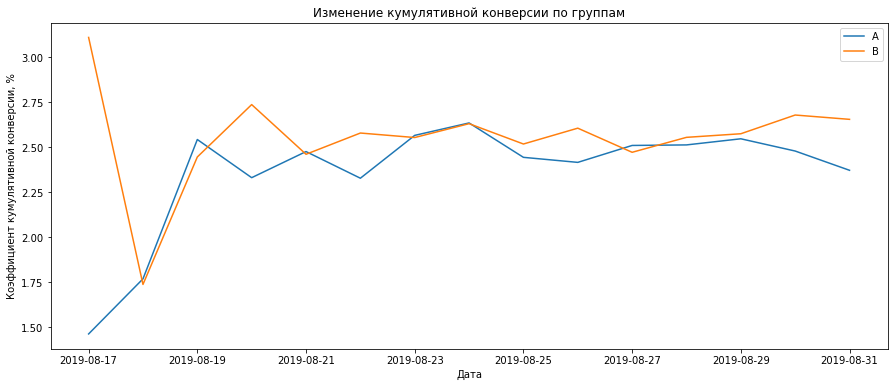

In [90]:
plt.figure(figsize=[15,6])
plt.plot(data_aggregated_A_2nd_half['date'], 100*data_aggregated_A_2nd_half['conversion'], label='A')
plt.plot(data_aggregated_B_2nd_half['date'], 100*data_aggregated_B_2nd_half['conversion'], label='B')
plt.title('Изменение кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Коэффициент кумулятивной конверсии, %')
plt.legend()
plt.show()

График относительного изменения кумулятивной конверсии группы B к группе A

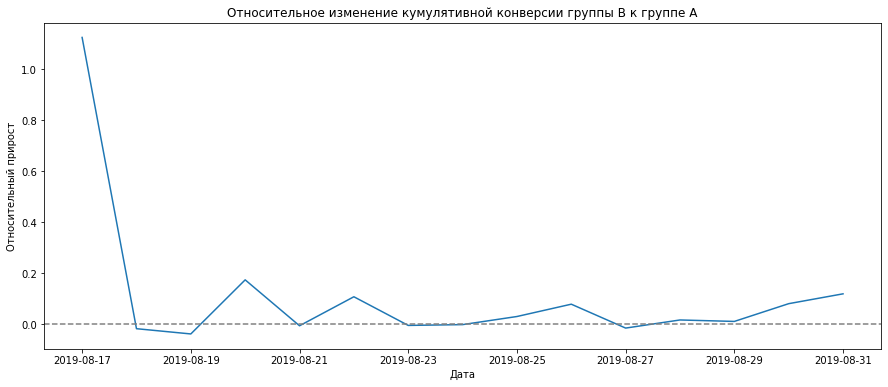

In [91]:
plt.figure(figsize=[15,6])
plt.plot(merged_data_aggregated_AB_2nd_half['date'],
    merged_data_aggregated_AB_2nd_half['conversion_B'] / merged_data_aggregated_AB_2nd_half['conversion_A'] - 1)
plt.xlabel('Дата')
plt.ylabel('Относительный прирост')
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

Графики показывают небольшой выигрыш в последние дни группы **B**. Теперь посчитаю статистическую значимость различия.

Число пользователей, не совершивших покупки (по группам):

In [92]:
null_users_A_2nd_half = visitors_2nd_half.query('group == "A"')['visitors'].sum() - len(data_by_users_A_2nd_half)
null_users_B_2nd_half = visitors_2nd_half.query('group == "B"')['visitors'].sum() - len(data_by_users_B_2nd_half)
print('Группа А: {} \nГруппа В: {}'.format(null_users_A_2nd_half, null_users_B_2nd_half))

Группа А: 8439 
Группа В: 8622


Таблицы по заказам и выручке посетителей, не совершивших покупки:

In [93]:
#Группа А
data_by_null_users_A_2nd_half = pd.DataFrame([[0,0,0,0]], index=np.arange(null_users_A_2nd_half))
data_by_null_users_A_2nd_half.index = data_by_null_users_A_2nd_half.index + data_by_users_A_2nd_half.index.max() + 1
data_by_null_users_A_2nd_half.columns = ['visitorId', 'orders', 'revenue', 'mean_check']
#Группа В
data_by_null_users_B_2nd_half = pd.DataFrame([[0,0,0,0]], index=np.arange(null_users_B_2nd_half))
data_by_null_users_B_2nd_half.index = data_by_null_users_B_2nd_half.index + data_by_users_B_2nd_half.index.max() + 1
data_by_null_users_B_2nd_half.columns = ['visitorId', 'orders', 'revenue', 'mean_check']
data_by_null_users_A_2nd_half.head()

,visitorId,orders,revenue,mean_check
202,0,0,0,0
203,0,0,0,0
204,0,0,0,0
205,0,0,0,0
206,0,0,0,0


Объединю таблицы с покупателями и прочими посетителями:

In [94]:
#Группа А
sample_A_2nd_half = pd.concat([data_by_users_A_2nd_half, data_by_null_users_A_2nd_half], axis=0)
#Группа В
sample_B_2nd_half = pd.concat([data_by_users_B_2nd_half, data_by_null_users_B_2nd_half], axis=0)
sample_A_2nd_half

,visitorId,orders,revenue,mean_check
0,11685486,1,6201,6201.0
1,138252163,1,4580,4580.0
2,151496413,1,350,350.0
3,178249104,1,16950,16950.0
4,181166394,1,4780,4780.0
...,...,...,...,...
8636,0,0,0,0.0
8637,0,0,0,0.0
8638,0,0,0,0.0
8639,0,0,0,0.0


Вывод о статистической значимости различий в конверсии между группами сделаю по значениям количества заказов таблиц **sample_A_2nd_half** и **sample_В_2nd_half**. Сформулирую гипотезы:  
 - Нулевая гипотеза: В группах А и В средние конверсии одинаковы
 - Альтернативная гипотеза: В группах А и В средние конверсии отличаются

In [95]:
conversion_pvalue_2nd_half = st.mannwhitneyu(sample_A_2nd_half['orders'], sample_B_2nd_half['orders'])[1]
print('Значение p-value при проверке гипотезы о равности средних конверсий в группах A и B: {:.5f}'
      .format(conversion_pvalue_2nd_half))

Значение p-value при проверке гипотезы о равности средних конверсий в группах A и B: 0.14288


In [96]:
if conversion_pvalue_2nd_half > 0.05:
    print('Гипотеза о равности средних конверсий в группах А и В скорее верная')
else:
    print('Гипотеза о равности средних конверсий в группах А и В скорее ложная')

Гипотеза о равности средних конверсий в группах А и В скорее верная


Относительный прирост конверсии группы В:

In [97]:
conversion_pvalue_2nd_half_gain = sample_B_2nd_half['orders'].mean() / sample_A_2nd_half['orders'].mean() - 1
print('{:.3f} %'.format(conversion_pvalue_2nd_half_gain*100))

11.914 %


**Вывод**:
 - Судя по графикам, разница в конверссии в группах не определяется.
 - Результаты проверки гипотезы и подсчета относительного прироста также нельзя назвать однозначными. Необходимы еще наблюдения.

### 2.16.3. Подсчет желательной продолжительности тестирования

Для этого воспользуюсь ресурсом **vwo.com**. Укажу такие значения параметров:
 - базовая конверсия: 3%
 - Значение разницы в конверсиях, которое желательно обнаружить: 10%
 - Среднее число посетителй в день: 607
 - Процент посетителей, участвующих в тестировании: 50%

Ресурс рекомендовал проводить тестирование 341 день.

**Выводы:**
 - Относительный прирост конверсии остался почти в том же порядке, а значение p-value сильно приблизилось к уровню статистической значимости. Но результаты все равно противоречивые.
 - Ресурс **vwo.com** рекомендовал проводить тестирование 341 день.

<a name="2.17.">-></a> 
<a href="#0">К содержанию</a>

## 2.17. Выводы по результатам теста

Сделаю выводы по основным метрикам (конверсия и средний чек), вычисленным при различных обстоятельствах: 
 - Сырые данные (**raw_data**)
 - Очищенные данные (**normal_data**)
 - Очищенные данные с уменьшенным эффектом подглядывания (**2last_weeks_normal_data**)

In [98]:
pd.DataFrame(data=[
    [conversion_pvalue, conversion_gain*100, mean_check_pvalue, mean_check_gain*100],
    [normal_conversion_pvalue, normal_conversion_gain*100, normal_mean_check_pvalue, normal_mean_check_gain*100],
    [conversion_pvalue_2nd_half, conversion_pvalue_2nd_half_gain*100, 
     mean_check_pvalue_2nd_half, mean_check_2nd_half_gain*100]
], 
             columns=['conversion_pvalue (alpha=0.05)','conversion_gain, %',
                      'mean-check_pvalue (alpha=0.05)','mean-check_gain, %',],
             index=['raw_data', 'normal_data', '2last_weeks_normal_data']
    
)

,conversion_pvalue (alpha=0.05),"conversion_gain, %",mean-check_pvalue (alpha=0.05),"mean-check_gain, %"
raw_data,0.005453,16.004568,0.410729,31.308413
normal_data,0.003474,18.946065,0.428657,-1.565365
2last_weeks_normal_data,0.142882,11.914321,0.446677,-5.363182


**По данным из таблицы можно сделать следующие выводы**:  
 - **Конверсия**:
   - Сырые и очищенные данные говорят о явной разнице в конверсии
   - Если минимизировать эффект подглядывания, то разница в конверсии уменьшается: гипотеза об их равности получается уже не такой ложной и относительный прирост уменьшился.
 - **Средний чек**:
   - По сырым данным получаются противоречивые метрики. Гипотеза о равности средних чеков скорее верная, но относительный прирост велик
   - После удаления данных об аномальных покупках метрики перестают быть противоречивыми. Подсчеты говорят о схожести средних чеков
   - Если минимизировать эффект подглядывания, то отношение средних чеков немного меняется и результаты становятся немногим более противоречивыми, чем в случае с просто очищенными данными.

<a name="3.">-></a> 
<a href="#0">К содержанию</a>

# 3. Общий вывод и рекомендации

**Вывод по приоретизация гипотез**:  
 По результатам применения наиболее объективного датафрейма RICE - тройка наиболее прерспективных для проверки гипотез:
  - *Запустить акцию, дающую скидку на товар в день рождения*
  - *Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей*
  - *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*  
    
**Вывод по анализу данных и А/Б-теста**:  
 Выводы по основным метрикам (конверсия и средний чек):
  - **Конверсия**. Анализ имеющихся данных показал, что в процессе их очистки результаты стремятся к подтверждению гипотезы о равности конверсий. Но этого не достаточно для окончательных выводов.
  - **Средний чек**. Здесь ситуация более однозначная, чем с конверсией. Дополнительные наблюдения скорее всего подтвердят гипотезу о равности средних чеков в группах
  
**Рекомендации**:
  
  Рекомендация здесь одна. Стоит продолжить тест с чекпойнтами каждые 2 недели для расчета динамики измения метрик. Ресурс **vwo.com** рекомендовал проводить тестирование в течение 341 дня. Если судить по уже имеющимся данными, нам потребуется меньше времени для сравнения групп.